In [9]:
import numpy as np
import pandas as pd 

import sys 
sys.path.append("/scratch/m/murray/dtolgay/cloudy_runs/python_files/run_after_cloudy_jobs_finished")
from calculate_cloudy_outputs import get_fdir, get_L_line # type: ignore 
from cloudy_runs_functions import find_converged_run

import matplotlib.pyplot as plt

## Determine centers

In [3]:
center = {
    "log_hden": 3.0,
    "log_metallicity": 0.5,
    "log_turbulence": 1.0,
    "log_isrf": -5.0,
    "log_radius": 4.0,
}

train_data_file_path = "/scratch/m/murray/dtolgay/cloudy_runs/z_0/cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_above_minus_2"
fdir = get_fdir(center)

print(fdir)

# Read em_str file 
path_integrals, _ = get_L_line(center = center, train_data_file_path = train_data_file_path)

# Read the .out file 
path_to_out_file = f"{train_data_file_path}/{fdir}/{fdir}.out"
lines_of_interest = []
target = "CO                  2600.05m"
with open(path_to_out_file, "r") as f:
    lines = f.readlines()
    # Check a line that contains "CO                  2600.05m "
    for line in lines:
        if target in line and len(line.strip()) > len(target):
            lines_of_interest.append(line)


hden3.00000_metallicity0.50000_turbulence1.00000_isrf-5.00000_radius4.00000


In [4]:
np.log10(path_integrals['co10'])

np.float64(-4.670161914625416)

In [5]:
lines_of_interest 

['CO                  2600.05m   -5.002    1.9434      He 1                9515.00A   -6.791    0.0316      He 1                2628.99A   -7.872    0.0026\n',
 'CO                  2600.05m   -5.011    3.8052      CH2                 93.6365m   -6.788    0.0637      CH                  87.9643m   -8.019    0.0037\n',
 'CO                  2600.05m  4.86e+03  4.86e+03      CO                  1300.05m  1.42e+04  1.42e+04\n',
 'CO                  2600.05m   -4.817    2.9580      N2H+                1072.26m   -6.692    0.0394      He 1                8203.71A   -7.871    0.0026\n',
 'CO                  2600.05m   -4.832 66576.938      CH                  9.18867c   -9.440    1.6428      He 1                4.37272m  -11.966    0.0049\n',
 'CO                  2600.05m  5.22e+03  5.22e+03      CO                  1300.05m  1.50e+04  1.50e+04\n',
 'CO                  2600.05m   -4.911    2.6517      CH2                 93.5578m   -6.766    0.0371      SiS                 8254.30m   -7.

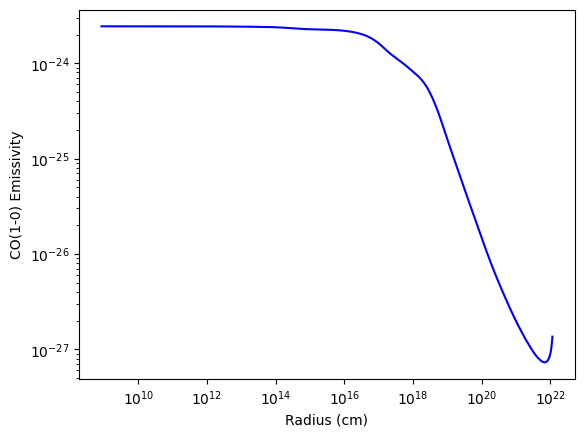

In [10]:
# Read the .em_str file
path_to_em_str_file = f"{train_data_file_path}/{fdir}/{fdir}.em_str"
cloudy_em_str = np.loadtxt(
    fname=f"{train_data_file_path}/{fdir}/{fdir}_em.str"
)
cloudy_em_str = find_converged_run(cloudy_em_str)

plt.plot(
    cloudy_em_str[:, 0],
    cloudy_em_str[:, 4],
    color="blue",
)
plt.xlabel('Radius (cm)')
plt.ylabel('CO(1-0) Emissivity')

plt.xscale('log')
plt.yscale('log')

plt.show()